In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
np.seed = 7
train_data = np.r_[np.random.normal(size=(100, 2)), np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[np.zeros(100), np.ones(100)]

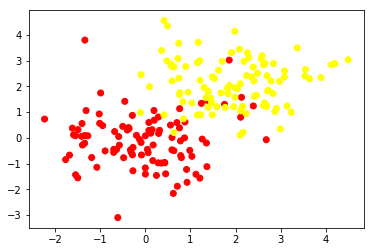

In [58]:
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = 'autumn');

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=17)

In [12]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [14]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [15]:
xx, yy = get_grid(train_data)

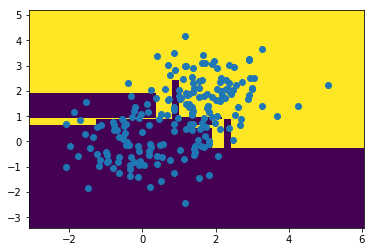

In [17]:
tree_predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, tree_predicted)
plt.scatter(train_data[:, 0], train_data[:, 1]);

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(clf_tree, feature_names=['x1', 'x2'], out_file='small_tree.dot', filled=True)

In [ ]:
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=4).fit(train_data, train_labels)
clf_knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

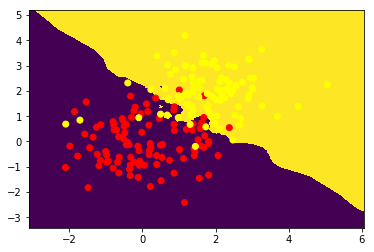

In [36]:
knn_predicted = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, knn_predicted)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = 'autumn');

In [61]:
train_selection = np.random.choice(train_data.shape[0], round(len(train_data) * 0.7), replace = False)
training = train_data[train_selection]
training_labels = train_labels[train_selection]
training.shape

(140, 2)

In [62]:
test_selection = np.setxor1d(np.arange(train_data.shape[0]), train_selection)
testing = train_data[test_selection]
testing_labels = train_labels[test_selection]
testing.shape

(60, 2)

In [66]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=17)

In [67]:
clf_tree.fit(training, training_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [71]:
pred = clf_tree.predict(testing)

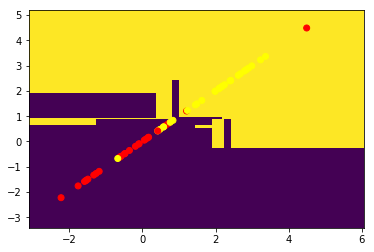

In [76]:
plt.pcolormesh(xx, yy, tree_predicted)
plt.scatter(testing[:,0], testing[:,0], c = pred, cmap = 'autumn')

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(testing_labels, pred)

0.83333333333333337